In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.sans-serif'] = ['SimHei']

## 编写神经网络反向传播算法

### 分类（损失函数为交叉熵）

In [67]:
class NeuralNetwork_clf:
    def __init__(self, layer_sizes, learning_rate=0.01):
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.num_layers = len(layer_sizes)

        # 初始化权重和偏置
        self.weights = [np.random.rand(layer_sizes[i], layer_sizes[i+1]) for i in range(self.num_layers - 1)]
        self.biases = [np.zeros((1, size)) for size in layer_sizes[1:]]

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-15  # 避免对数中出现无穷大值
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def forward(self, X):
        self.layer_outputs = [X]
        for i in range(self.num_layers - 1):
            layer_input = np.dot(self.layer_outputs[-1], self.weights[i]) + self.biases[i]
            if i == self.num_layers - 2:
                layer_output = self.softmax(layer_input)
            else:
                layer_output = self.sigmoid(layer_input)
            self.layer_outputs.append(layer_output)
        return self.layer_outputs[-1]

    def backward(self, X, y_true):
        # 反向传播
        output_error = self.layer_outputs[-1] - y_true

        self.weight_gradients = []
        self.bias_gradients = []

        for i in range(self.num_layers - 2, -1, -1):
            # 计算梯度
            weight_gradient = np.dot(self.layer_outputs[i].T, output_error)
            bias_gradient = np.sum(output_error, axis=0, keepdims=True)

            # 保存梯度
            self.weight_gradients.insert(0, weight_gradient)
            self.bias_gradients.insert(0, bias_gradient)

            # 更新output_error用于下一层
            output_error = output_error.dot(self.weights[i].T) * self.sigmoid_derivative(self.layer_outputs[i])

    def update_weights(self):
        # 更新权重和偏置
        for i in range(self.num_layers - 1):
            self.weights[i] -= self.weight_gradients[i] * self.learning_rate
            self.biases[i] -= np.sum(self.bias_gradients[i], axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y_true, epochs=1000):
        losses = []

        for epoch in range(epochs):
            # 前向传播
            self.forward(X)

            # 计算损失
            loss = self.cross_entropy_loss(y_true, self.layer_outputs[-1])

            # 反向传播
            self.backward(X, y_true)

            # 更新权重和偏置
            self.update_weights()

            # 记录损失
            losses.append(loss)

        # 可视化损失
        plt.plot(range(epochs), losses)
        plt.xlabel('训练次数')
        plt.ylabel('损失函数值')
        plt.title('训练过程中损失函数变化')
        plt.show()

### 回归（损失函数为均方差）

In [70]:
class NeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.01):
        self.layer_sizes = layer_sizes  # # 一个包含每个层维度的列表
        self.learning_rate = learning_rate
        self.num_layers = len(layer_sizes)
        
        np.random.seed(1017)

        # 初始化权重w和常数项b
        self.weights = [np.random.rand(layer_sizes[i], layer_sizes[i+1]) for i in range(self.num_layers - 1)]
        self.biases = [np.zeros((1, size)) for size in layer_sizes[1:]]

    def sigmoid(self, x):  # sigmoid函数
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):  # sigmoid函数的导数
        return x * (1 - x)

    def mean_squared_error(self, y_true, y_pred):  # 均方误差
        return np.mean((y_true - y_pred) ** 2)

    def forward(self, X):  # 前向传播
        self.layer_outputs = [X]
        for i in range(self.num_layers - 1):
            layer_input = np.dot(self.layer_outputs[-1], self.weights[i]) + self.biases[i]
            layer_output = self.sigmoid(layer_input)
            self.layer_outputs.append(layer_output)
        return self.layer_outputs[-1]

    def backward(self, X, y_true):  # 反向传播
        output_error = y_true - self.layer_outputs[-1]
        output_delta = output_error * self.sigmoid_derivative(self.layer_outputs[-1])

        self.weight_gradients = []
        self.bias_gradients = []

        for i in range(self.num_layers - 2, -1, -1):
            # 计算梯度
            weight_gradient = np.dot(self.layer_outputs[i].T, output_delta)
            bias_gradient = np.sum(output_delta, axis=0, keepdims=True)

            # 保存梯度
            self.weight_gradients.insert(0, weight_gradient)
            self.bias_gradients.insert(0, bias_gradient)

            # 更新output_delta用于下一层
            if i > 0:
                output_delta = output_delta.dot(self.weights[i].T) * self.sigmoid_derivative(self.layer_outputs[i])

    def update_weights(self):  # 更新w和b
        for i in range(self.num_layers - 1):
            self.weights[i] += self.weight_gradients[i] * self.learning_rate
            self.biases[i] += np.sum(self.bias_gradients[i], axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y_true, epochs=1000):
        losses = []
        for epoch in range(epochs):
            # 前向传播
            self.forward(X)

            # 计算损失
            loss = self.mean_squared_error(y_true, self.layer_outputs[-1])

            # 反向传播
            self.backward(X, y_true)

            # 更新权重和偏置
            self.update_weights()
            
            # 记录损失
            losses.append(loss)
            
        plt.plot(range(epochs), losses)
        plt.xlabel('训练次数')
        plt.ylabel('损失函数值')
        plt.title('训练过程中损失函数变化')
        plt.show()

## 测试代码是否能跑通

#### 1. 回归

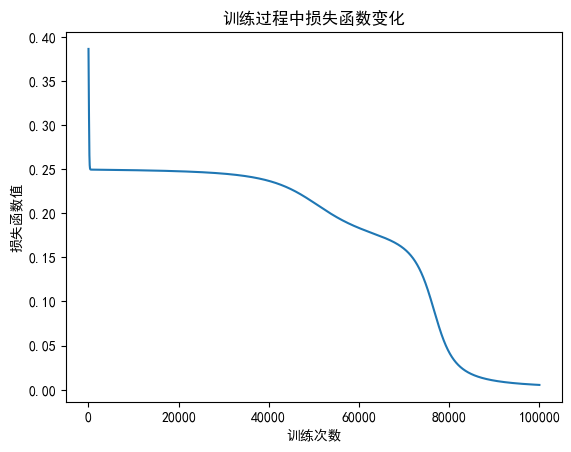


预测值:
 [[0.06645521]
 [0.92875705]
 [0.92942389]
 [0.08310243]]


In [73]:
layer_sizes = [2, 5, 4, 1]  # 输入层2个节点，隐藏层分别有4个和3个节点，输出层1个节点
learning_rate = 0.01

nn = NeuralNetwork(layer_sizes, learning_rate)

# 训练数据集
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[0], [1], [1], [0]])

# 训练模型
nn.train(X_train, y_train, epochs=100000)

# 测试模型
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = nn.forward(test_data)
print("\n预测值:\n", predictions)

#### 2. 分类

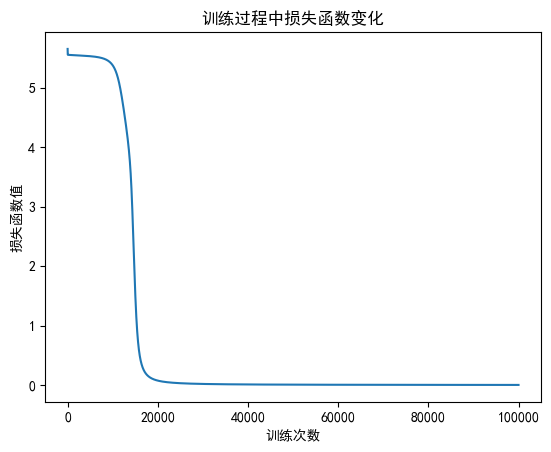


预测值:
 [[9.99653872e-01 3.46128481e-04]
 [2.98668659e-04 9.99701331e-01]
 [2.98503990e-04 9.99701496e-01]
 [9.99681332e-01 3.18668428e-04]]


In [74]:
layer_sizes = [2, 4, 3, 2]  # 输入层2个节点，隐藏层分别有4个和3个节点，输出层2个节点
learning_rate = 0.01

nn_clf = NeuralNetwork_clf(layer_sizes, learning_rate)

X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# One-hot编码的标签
y_train_one_hot = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])

# 训练模型
nn_clf.train(X_train, y_train_one_hot, epochs=100000)

# 测试模型
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = nn_clf.forward(test_data)
print("\n预测值:\n", predictions)

## 尝试实现一个分类任务

In [95]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 生成一个二分类数据集
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=1017)

y_onehot = np.zeros((y.shape[0], 2))
y_onehot[np.arange(y.shape[0]), y.flatten()] = 1

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=1017)

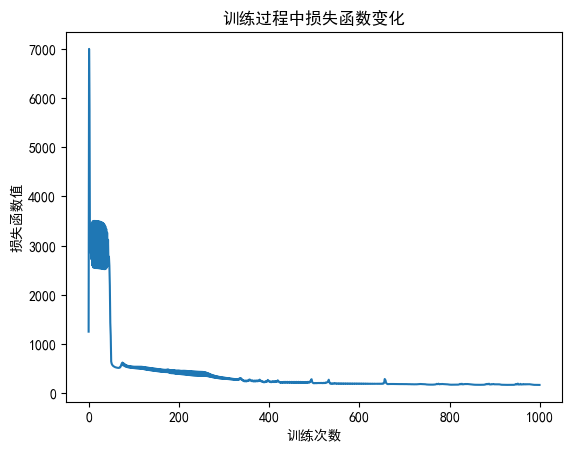

训练集准确率:94.875%
测试集准确率:92.5%


In [102]:
# 定义层维度
layer_dims = [X.shape[1], 5, 3, 2]

model = NeuralNetwork_clf(layer_dims)

model.train(X_train, y_train, epochs=1000)

train_predictions = model.forward(X_train)
train_predictions = (train_predictions > 0.5).astype(int)

test_predictions = model.forward(X_test)
test_predictions = (test_predictions > 0.5).astype(int)

# 计算准确率
train_accuracy = accuracy_score(y_train.flatten(), train_predictions.flatten())
test_accuracy = accuracy_score(y_test.flatten(), test_predictions.flatten())

print(f"训练集准确率:{train_accuracy*100}%")
print(f"测试集准确率:{test_accuracy*100}%")

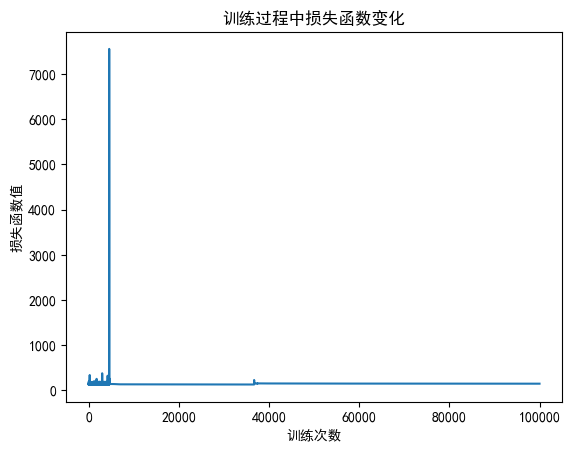

训练集准确率:96.0%
测试集准确率:91.0%


In [104]:
# 训练神经网络
model.train(X_train, y_train, epochs=100000)

train_predictions = model.forward(X_train)
train_predictions = (train_predictions > 0.5).astype(int)

test_predictions = model.forward(X_test)
test_predictions = (test_predictions > 0.5).astype(int)

# 计算准确率
train_accuracy = accuracy_score(y_train.flatten(), train_predictions.flatten())
test_accuracy = accuracy_score(y_test.flatten(), test_predictions.flatten())

print(f"训练集准确率:{train_accuracy*100}%")
print(f"测试集准确率:{test_accuracy*100}%")

可以发现次数为1000时，模型已经基本训练完成。过多的训练次数可能会使模型过拟合，即出现在训练集上表现变好，而在测试集上表现变差（泛化能力变弱）

## 探究隐层层数对模型效果的影响

### 隐层层数=1

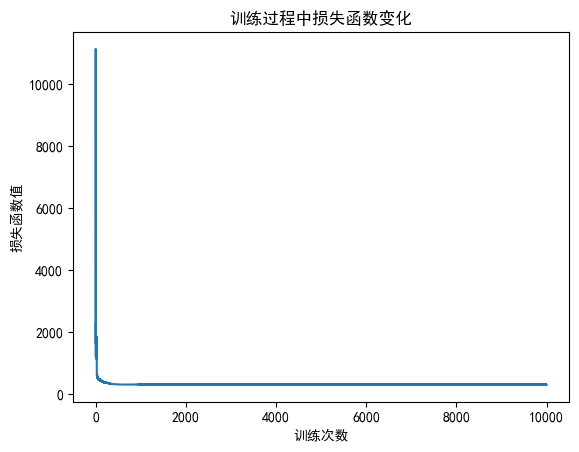

训练集准确率:91.875%
测试集准确率:92.0%


In [109]:
# 定义多隐藏层神经网络的层维度
layer_dims = [X.shape[1], 5, 2]

model_1 = NeuralNetwork_clf(layer_dims)

model_1.train(X_train, y_train, epochs=10000)

train_predictions = model_1.forward(X_train)
train_predictions = (train_predictions > 0.5).astype(int)

test_predictions = model_1.forward(X_test)
test_predictions = (test_predictions > 0.5).astype(int)

# 计算准确率
train_accuracy = accuracy_score(y_train.flatten(), train_predictions.flatten())
test_accuracy = accuracy_score(y_test.flatten(), test_predictions.flatten())

print(f"训练集准确率:{train_accuracy*100}%")
print(f"测试集准确率:{test_accuracy*100}%")

### 隐层层数=2

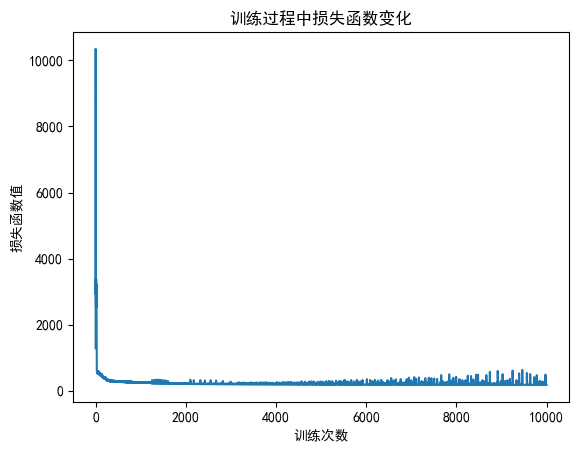

训练集准确率:96.625%
测试集准确率:93.0%


In [110]:
# 定义多隐藏层神经网络的层维度
layer_dims = [X.shape[1], 5, 5, 2]

model_2 = NeuralNetwork_clf(layer_dims)

model_2.train(X_train, y_train, epochs=10000)

train_predictions = model_2.forward(X_train)
train_predictions = (train_predictions > 0.5).astype(int)

test_predictions = model_2.forward(X_test)
test_predictions = (test_predictions > 0.5).astype(int)

# 计算准确率
train_accuracy = accuracy_score(y_train.flatten(), train_predictions.flatten())
test_accuracy = accuracy_score(y_test.flatten(), test_predictions.flatten())

print(f"训练集准确率:{train_accuracy*100}%")
print(f"测试集准确率:{test_accuracy*100}%")

### 隐层层数=3

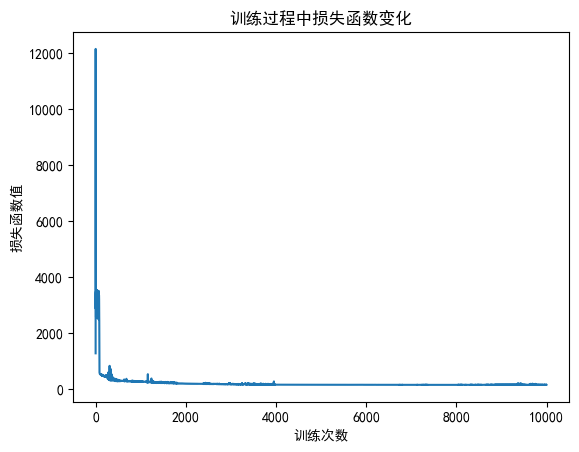

训练集准确率:97.25%
测试集准确率:95.5%


In [108]:
# 定义多隐藏层神经网络的层维度
layer_dims = [X.shape[1], 5, 5, 5, 2]

model_3 = NeuralNetwork_clf(layer_dims)

model_3.train(X_train, y_train, epochs=10000)

train_predictions = model_3.forward(X_train)
train_predictions = (train_predictions > 0.5).astype(int)

test_predictions = model_3.forward(X_test)
test_predictions = (test_predictions > 0.5).astype(int)

# 计算准确率
train_accuracy = accuracy_score(y_train.flatten(), train_predictions.flatten())
test_accuracy = accuracy_score(y_test.flatten(), test_predictions.flatten())

print(f"训练集准确率:{train_accuracy*100}%")
print(f"测试集准确率:{test_accuracy*100}%")

### 隐层层数=4

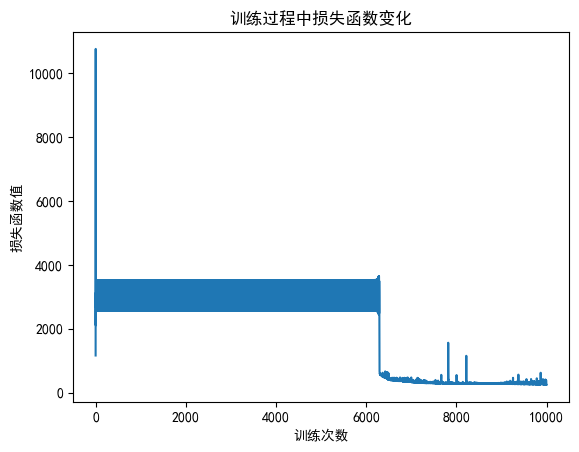

训练集准确率:95.0%
测试集准确率:94.5%


In [111]:
# 定义多隐藏层神经网络的层维度
layer_dims = [X.shape[1], 5, 5, 5, 5, 2]

model_4 = NeuralNetwork_clf(layer_dims)

model_4.train(X_train, y_train, epochs=10000)

train_predictions = model_4.forward(X_train)
train_predictions = (train_predictions > 0.5).astype(int)

test_predictions = model_4.forward(X_test)
test_predictions = (test_predictions > 0.5).astype(int)

# 计算准确率
train_accuracy = accuracy_score(y_train.flatten(), train_predictions.flatten())
test_accuracy = accuracy_score(y_test.flatten(), test_predictions.flatten())

print(f"训练集准确率:{train_accuracy*100}%")
print(f"测试集准确率:{test_accuracy*100}%")

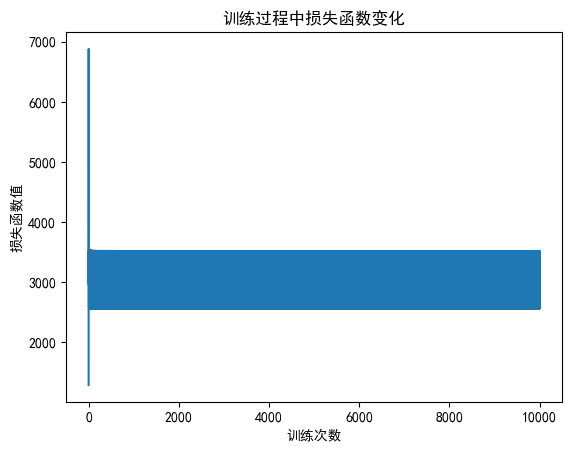

训练集准确率:48.125%
测试集准确率:56.00000000000001%


In [112]:
# 定义多隐藏层神经网络的层维度
layer_dims = [X.shape[1], 5, 5, 5, 5, 5, 2]

model_5 = NeuralNetwork_clf(layer_dims)

model_5.train(X_train, y_train, epochs=10000)

train_predictions = model_5.forward(X_train)
train_predictions = (train_predictions > 0.5).astype(int)

test_predictions = model_5.forward(X_test)
test_predictions = (test_predictions > 0.5).astype(int)

# 计算准确率
train_accuracy = accuracy_score(y_train.flatten(), train_predictions.flatten())
test_accuracy = accuracy_score(y_test.flatten(), test_predictions.flatten())

print(f"训练集准确率:{train_accuracy*100}%")
print(f"测试集准确率:{test_accuracy*100}%")

* 可以发现刚开始时，随着网络层数的增加，模型的效果得到了很好的提升
* 之后，可能是由于过多的层数增加训练难度，使得梯度消失，难已收敛，导致模型效果下降

### 增加隐层中神经元个数

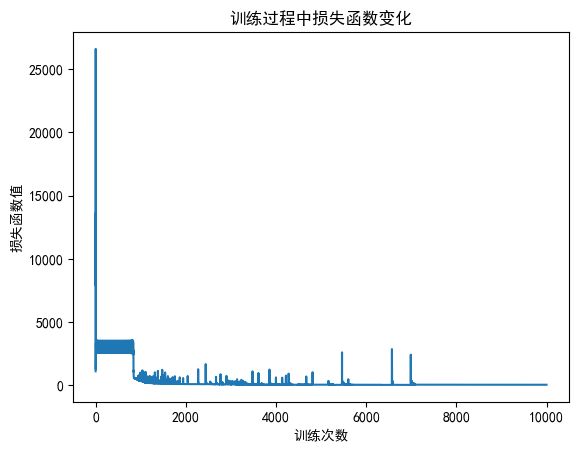

训练集准确率:99.5%
测试集准确率:97.0%


In [115]:
# 定义多隐藏层神经网络的层维度
layer_dims = [X.shape[1], 10, 10, 10, 2]

model_6 = NeuralNetwork_clf(layer_dims)

model_6.train(X_train, y_train, epochs=10000)

train_predictions = model_6.forward(X_train)
train_predictions = (train_predictions > 0.5).astype(int)

test_predictions = model_6.forward(X_test)
test_predictions = (test_predictions > 0.5).astype(int)

# 计算准确率
train_accuracy = accuracy_score(y_train.flatten(), train_predictions.flatten())
test_accuracy = accuracy_score(y_test.flatten(), test_predictions.flatten())

print(f"训练集准确率:{train_accuracy*100}%")
print(f"测试集准确率:{test_accuracy*100}%")

模型表现得到了提高

## 使用 sklearn 多层感知机算法求解手写数字识别的问题

* 多层感知机（Multilayer Perceptron, MLP）是一种基于神经网络的模型，它包含多个隐藏层，每个隐藏层包含多个神经元，每个神经元与前一层的所有神经元相连。在训练过程中，多层感知机通过反向传播算法来更新权重和偏置，以最小化目标函数。

* 神经网络是一种模拟生物神经系统的计算模型，它由大量的神经元和连接它们的权重组成。神经元接收输入信号，对其进行处理，并将输出信号传递给下一个神经元。神经网络也可以包含多个隐藏层，但不限于此，可以是一个或多个隐藏层。在训练过程中，神经网络使用反向传播算法来更新权重和偏置，以最小化目标函数。

* 因此，多层感知机是一种特定类型的神经网络，它包含多个隐藏层。

In [116]:
# 导入必要的库
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.metrics import accuracy_score

# 加载手写数字数据集
digits = datasets.load_digits()
X = digits.data
y = digits.target

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1017)

# 创建多层感知机模型
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam', random_state=1017)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

# 计算准确度
accuracy = accuracy_score(y_test, y_pred)
print(f'准确度: {accuracy:.2f}')


准确度: 0.95


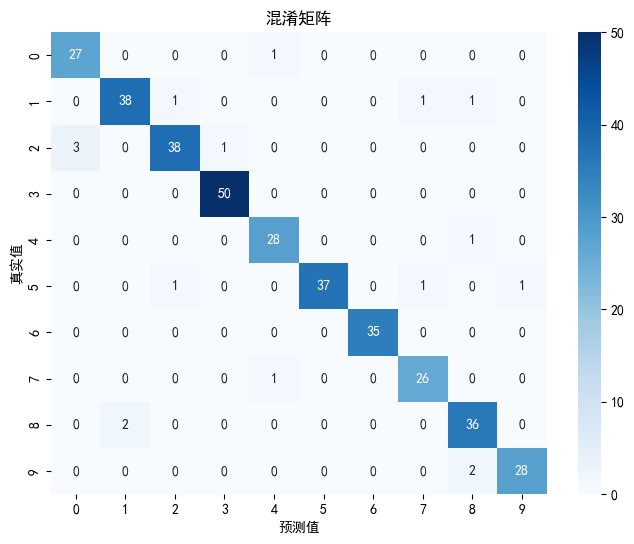

In [117]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 使用Seaborn库绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.title('混淆矩阵')
plt.xlabel('预测值')
plt.ylabel('真实值')
plt.show()

### 尝试使用自己编写的神经网络算法进行训练

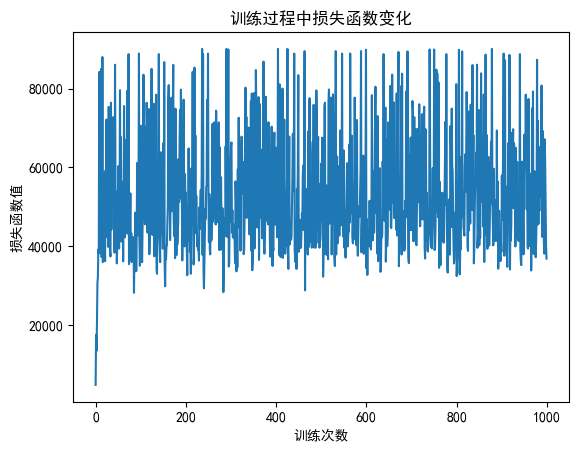

训练集准确率:82.08768267223383%
测试集准确率:81.55555555555556%


In [127]:
# 定义层维度
layer_dims = [X.shape[1], 3, 3, 10]

model_shouxie = NeuralNetwork_clf(layer_dims, 0.1)

model_shouxie.train(X_train, y_train, epochs=100000)

# 在训练集上进行预测
train_predictions = model_shouxie.forward(X_train)
train_predictions = (train_predictions > 0.5).astype(int)

# 在测试集上进行预测
test_predictions = model_shouxie.forward(X_test)
test_predictions = (test_predictions > 0.5).astype(int)

# 计算准确率
train_accuracy = accuracy_score(y_train.flatten(), train_predictions.flatten())
test_accuracy = accuracy_score(y_test.flatten(), test_predictions.flatten())

print(f"训练集准确率:{train_accuracy*100}%")
print(f"测试集准确率:{test_accuracy*100}%")

模型训练效果明显不好，为什么准确率还这么高？

回看代码，发现上述计算准确率的方法只适用于2分类问题的准确率计算，更改计算方式后：

In [137]:
y_pred_classes = np.argmax(test_predictions, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# 计算准确分类的样本数
correct_predictions = np.sum(y_pred_classes == y_true_classes)

# 计算准确率
accuracy = correct_predictions / len(y_test)
print(f"测试集准确率:{accuracy*100}%")

测试集准确率:7.777777777777778%


自己编写的神经网络算法计算速度太慢，故后续没有继续尝试。。。